In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
i = 4
sampled1 = np.load("samples/P200E10_1000T_fullstate_nofinalpos2/planned_traj1_%s_new.npy" % i, allow_pickle=True)
sampled2 = np.load("samples/P200E10_1000T_fullstate_nofinalpos2/planned_traj2_%s_new.npy" % i, allow_pickle=True)

In [31]:
np.shape(sampled2)

(1000, 7)

In [32]:
sampled1[:5]

array([[ 1.16051422e-01,  1.67634994e-03,  2.08098086e-01,
         2.18389185e+00,  2.19591564e+00,  7.17747035e-02,
         2.09546204e+00],
       [ 1.20680284e-01, -1.14708241e-03,  2.08168649e-01,
         2.18205094e+00,  2.20037730e+00,  7.03915893e-02,
         2.05728836e+00],
       [ 1.20010929e-01, -6.36861340e-04,  2.08076557e-01,
         2.18643503e+00,  2.20047337e+00,  7.16568388e-02,
         1.76582127e+00],
       [ 1.20224847e-01, -1.16837896e-03,  2.08443757e-01,
         2.18371499e+00,  2.19809863e+00,  7.13153216e-02,
         2.09480494e+00],
       [ 1.26839536e-01, -3.12660052e-03,  2.08231821e-01,
         2.18442813e+00,  2.19689145e+00,  7.50042120e-02,
         1.37759550e+00]])

In [33]:
sampled2[:5]

array([[ 2.08425890e-01,  1.24053710e-03,  3.14504165e-02,
         3.72850881e-04, -1.26233354e-02,  3.14123817e+00,
         8.01078834e+02],
       [ 2.07759563e-01,  2.30258180e-03,  3.23718635e-02,
        -2.66315643e-03, -1.69041225e-02,  3.13842929e+00,
         7.99505725e+02],
       [ 2.08229979e-01,  2.48448690e-03,  3.18945394e-02,
         1.16288781e-03, -1.22646265e-02,  3.13540623e+00,
         8.00334910e+02],
       [ 2.08147431e-01,  1.84214702e-03,  3.24049651e-02,
        -3.49433601e-03, -1.50732098e-02,  3.13987531e+00,
         7.99631848e+02],
       [ 2.07810250e-01,  1.58276775e-03,  3.14622421e-02,
        -1.74425929e-03, -1.28220365e-02,  3.13945674e+00,
         7.99838056e+02]])

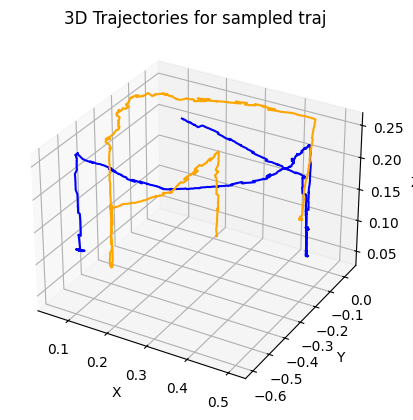

In [34]:
from mpl_toolkits.mplot3d import Axes3D

def plot_trajectories(arr1: np.ndarray, arr2:np.ndarray):
    x1, y1, z1 = arr1[:, 0], arr1[:, 1], arr1[:, 2]
    x2, y2, z2 = arr2[:, 0], arr2[:, 1], arr2[:, 2]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x1, y1, z1, color="blue")
    ax.plot(x2, y2, z2, color="orange")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'3D Trajectories for sampled traj')
    plt.show()

plot_trajectories(sampled1, sampled2)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# --- Configuration ---
# Set the index 'i' for the trajectory you want to plot
trajectory_index = 19

# Adjust the animation speed and smoothness
# A larger step will make the animation faster but less detailed.
frame_step = 5
# Frames per second for the output GIF
animation_fps = 15

# --- 2. Select the Trajectories ---
# Select the data for the two trajectories based on the index
# traj1_data = expert_states[trajectory_index, ::frame_step, :3]
# traj2_data = expert_states[trajectory_index, ::frame_step, 7:10]
traj1_data = sampled1[::frame_step, :3]
traj2_data = sampled2[::frame_step, :3]
num_frames = traj1_data.shape[0]


# --- 3. Set up the 3D Plot ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Initialize two empty 3D lines
line1, = ax.plot([], [], [], lw=2, label='Trajectory 1 (data[:, :, :3])')
line2, = ax.plot([], [], [], lw=2, label='Trajectory 2 (data[:, :, 7:10])')

# Set plot limits based on the data range to ensure everything is visible
all_data = np.vstack([traj1_data, traj2_data])
ax.set_xlim(all_data[:, 0].min(), all_data[:, 0].max())
ax.set_ylim(all_data[:, 1].min(), all_data[:, 1].max())
ax.set_zlim(all_data[:, 2].min(), all_data[:, 2].max())

# Add labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title(f'Animated 3D Trajectories for Index {trajectory_index}')
ax.legend()
ax.grid(True)


# --- 4. Define the Animation Update Function ---
def update(frame):
    """
    This function is called for each frame of the animation.
    It updates the data for the two lines, making them longer in each frame.
    """
    # Update trajectory 1
    line1.set_data(traj1_data[:frame+1, 0], traj1_data[:frame+1, 1])
    line1.set_3d_properties(traj1_data[:frame+1, 2])

    # Update trajectory 2
    line2.set_data(traj2_data[:frame+1, 0], traj2_data[:frame+1, 1])
    line2.set_3d_properties(traj2_data[:frame+1, 2])

    return line1, line2


# --- 5. Create and Save the Animation ---
# Create the animation object
ani = FuncAnimation(
    fig,
    update,
    frames=num_frames,
    blit=True
)

# Save the animation as a GIF file
output_filename = 'viz/P200E1_1000T_fullstate_nofinalpos/sampled0.gif'
print(f"Rendering and saving animation to '{output_filename}'...")
# The 'Pillow' writer is commonly available and good for creating GIFs.
ani.save(output_filename, writer='pillow', fps=animation_fps)
plt.close(fig) # prevent static plot from displaying
print("Animation saved successfully.")


Rendering and saving animation to 'viz/P200E1_1000T_fullstate_nofinalpos/sampled0.gif'...
Animation saved successfully.
